In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from numpy import array 
##Removes warning for chained assignments
pd.options.mode.chained_assignment = None  # default='warn'

2022-09-03 09:14:41.805261: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-03 09:14:41.805364: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [106]:
def create_sequences(df,period):
    #Create Time Lags
    for i in range(1,period+1):
        df[f't-{i}'] = df[df.columns[0]].shift(i)
    df.dropna(inplace = True)
    
    #create sequences
    X = []
    for i in range(len(df[df.columns[0]])):
        arr = []
        for j in range(1,period+1):
            arr.append(df[f't-{j}'][i])
        X.append(arr)
    y = df[df.columns[0]].tolist()
    X = array(X)
    y= array(y)
    #returns shaped X and y 
    return X.reshape((X.shape[0], X.shape[1], 1)),y

In [107]:
def split(X,y,test_size = 20 ):
    X_train = X[0:X.shape[0]-test_size]
    y_train = y[0:y.shape[0]-test_size]
    X_test = X[X.shape[0]-test_size:]
    y_test = y[y.shape[0]-test_size:]
    return (X_train,y_train,X_test,y_test)

In [108]:
df = pd.read_csv('../raw_data/ratios.csv')
df

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
0,2020-08-31,0.311845,0.310544,2.548054,0.203834,0.727693,2.136432,0.882281
1,2020-09-01,0.332974,0.306303,2.687319,0.203522,0.722940,2.094566,0.855546
2,2020-09-02,0.332368,0.315056,2.629334,0.204743,0.734758,2.125291,0.872526
3,2020-09-03,0.339772,0.310060,2.534974,0.201707,0.728923,2.210971,0.848504
4,2020-09-04,0.356920,0.300754,2.536138,0.199887,0.707646,2.152835,0.854765
...,...,...,...,...,...,...,...,...
492,2022-08-15,0.813028,0.321488,4.111073,0.197467,1.123670,3.277218,0.920803
493,2022-08-16,0.814154,0.323634,4.118669,0.200499,1.158238,3.283272,0.933379
494,2022-08-17,0.815450,0.327442,4.154118,0.201342,1.191888,3.347435,0.935173
495,2022-08-18,0.816374,0.333768,4.222490,0.204492,1.196920,3.371537,0.950678


In [109]:
df.set_index('Date',inplace=True)

In [110]:
#Model 

In [111]:
model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(20,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mae')

In [112]:
def run_model(model,X_train,y_train,X_test):
    model.fit(X_train,y_train, epochs=100, verbose=0)
    preds = []
    for i in range(len(X_test)):    
        pred = model.predict(X_test[i].reshape(1,20,1))
        preds.append(pred[0][0])
    return preds

In [113]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [114]:
frames = []
for column in df:
    frames.append(pd.DataFrame(df[column]))


In [115]:
X,y = create_sequences(frames[0],20)
frames[0]


,ALB_ZBRA,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-29,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,0.376953,0.386490,0.377806,...,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772,0.332368,0.332974,0.311845
2020-09-30,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,0.376953,0.386490,...,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772,0.332368,0.332974
2020-10-01,0.330732,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,0.376953,...,0.377806,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772,0.332368
2020-10-02,0.340060,0.330732,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,0.376984,...,0.386490,0.377806,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920,0.339772
2020-10-05,0.348504,0.340060,0.330732,0.348574,0.330664,0.320942,0.323581,0.327588,0.317605,0.372109,...,0.376953,0.386490,0.377806,0.375199,0.383597,0.372984,0.368015,0.367225,0.366863,0.356920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15,0.813028,0.812049,0.790774,0.788457,0.764204,0.741221,0.717486,0.710539,0.733862,0.754330,...,0.683022,0.685980,0.692162,0.688442,0.699419,0.677911,0.679211,0.674544,0.678144,0.689156
2022-08-16,0.814154,0.813028,0.812049,0.790774,0.788457,0.764204,0.741221,0.717486,0.710539,0.733862,...,0.669475,0.683022,0.685980,0.692162,0.688442,0.699419,0.677911,0.679211,0.674544,0.678144
2022-08-17,0.815450,0.814154,0.813028,0.812049,0.790774,0.788457,0.764204,0.741221,0.717486,0.710539,...,0.754330,0.669475,0.683022,0.685980,0.692162,0.688442,0.699419,0.677911,0.679211,0.674544


In [116]:
len(X[0])

20

In [118]:
predictions = []
X_trains = []
y_trains = []
X_tests = []
y_tests=[]
for frame in frames: 
    X,y = create_sequences(frame,20)
    X_train,y_train,X_test,y_test = split(X,y)
    preds = run_model(model,X_train,y_train,X_test)
    predictions.append(preds)
    X_trains.append(X_train)
    y_trains.append(y_train)
    X_tests.append(X_test)
    y_tests.append(y_test)

1/1 [==============================] - 0s 18ms/step


In [119]:
y_tests

[array([0.69941916, 0.68844238, 0.69216225, 0.6859797 , 0.6830216 ,
        0.66947524, 0.75433006, 0.73386229, 0.71053908, 0.71748567,
        0.74122061, 0.76420431, 0.78845742, 0.79077385, 0.81204942,
        0.81302763, 0.8141544 , 0.8154501 , 0.81637364, 0.82220391]),
 array([0.2947005 , 0.3010508 , 0.29422462, 0.29545994, 0.29469163,
        0.29194474, 0.29104536, 0.2869318 , 0.30029155, 0.29763194,
        0.30024027, 0.30321969, 0.30477671, 0.31460588, 0.32061243,
        0.32148836, 0.32363441, 0.32744178, 0.33376793, 0.33491889]),
 array([3.62225189, 3.61655163, 3.61899991, 3.68150531, 3.7645895 ,
        3.77823701, 3.78432686, 3.80667425, 3.95084226, 3.96477667,
        3.96527446, 3.98978402, 4.01504076, 4.03388329, 4.08567308,
        4.1110735 , 4.11866863, 4.15411777, 4.22248977, 4.28094974]),
 array([0.16331707, 0.16413345, 0.16313642, 0.16507483, 0.16729449,
        0.16907105, 0.16610229, 0.18408866, 0.18818212, 0.18143221,
        0.18152002, 0.18343224, 0.18662609

In [127]:
predictions

[[0.6644008,
  0.6783916,
  0.67732507,
  0.67455316,
  0.67582893,
  0.6701546,
  0.66215533,
  0.7061362,
  0.72657794,
  0.7049103,
  0.70058036,
  0.72571987,
  0.75198174,
  0.77445704,
  0.78151155,
  0.8004987,
  0.8072257,
  0.8055741,
  0.8081948,
  0.8101037],
 [0.28909045,
  0.2935694,
  0.29987106,
  0.2952651,
  0.29464978,
  0.29543033,
  0.29360607,
  0.29212648,
  0.28874037,
  0.2946896,
  0.2991674,
  0.29863852,
  0.30474102,
  0.3059324,
  0.31380278,
  0.32319897,
  0.3231349,
  0.3253169,
  0.32848,
  0.33379447],
 [3.5721755,
  3.5869226,
  3.61489,
  3.5784163,
  3.6678224,
  3.7166443,
  3.7456646,
  3.7310872,
  3.7632086,
  3.907648,
  3.937658,
  3.914344,
  3.949109,
  3.9659739,
  3.9829538,
  4.026442,
  4.04868,
  4.0584764,
  4.100203,
  4.171817],
 [0.16051431,
  0.16178271,
  0.16261497,
  0.16260672,
  0.16344425,
  0.1661399,
  0.16831955,
  0.16669571,
  0.17652094,
  0.18807492,
  0.18273044,
  0.18215677,
  0.18379351,
  0.1859695,
  0.19093406,


In [121]:
frames[0][frames[0].columns[0]]

Date
2020-11-24    0.362261
2020-11-25    0.356290
2020-11-27    0.359915
2020-11-30    0.354162
2020-12-01    0.359872
                ...   
2022-08-15    0.813028
2022-08-16    0.814154
2022-08-17    0.815450
2022-08-18    0.816374
2022-08-19    0.822204
Name: ALB_ZBRA, Length: 437, dtype: float64

In [146]:
frames[number][frames[number].columns[0][:200]]

Date
2020-10-27    0.274826
2020-10-28    0.267604
2020-10-29    0.263444
2020-10-30    0.269735
2020-11-02    0.267070
                ...   
2022-08-15    0.321488
2022-08-16    0.323634
2022-08-17    0.327442
2022-08-18    0.333768
2022-08-19    0.334919
Name: NRG_CPRT, Length: 457, dtype: float64

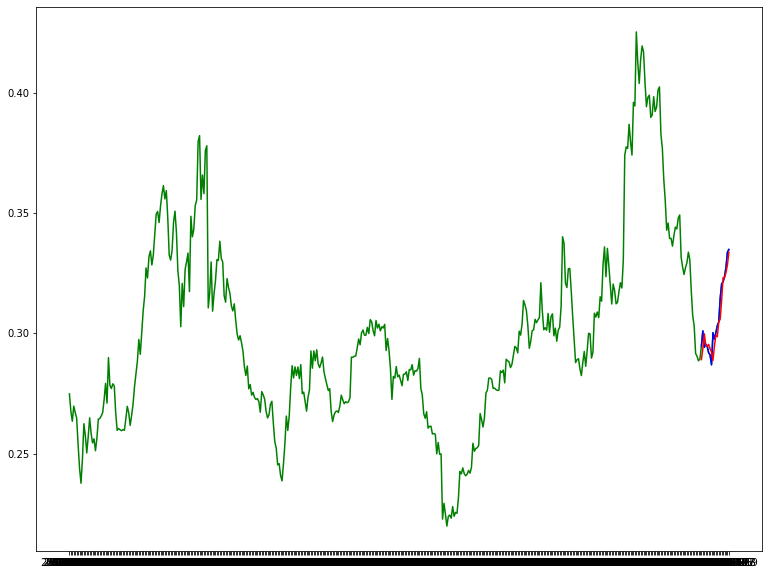

In [133]:
number = 1
fig, ax = plt.subplots(1,1,figsize = (13,10))
ax.plot(frames[number][frames[number].columns[0][0:100]],color='green')
ax.plot(frames[number].index[-20:],y_tests[number],color='blue')
ax.plot(frames[number].index[-20:],predictions[number],color='red')

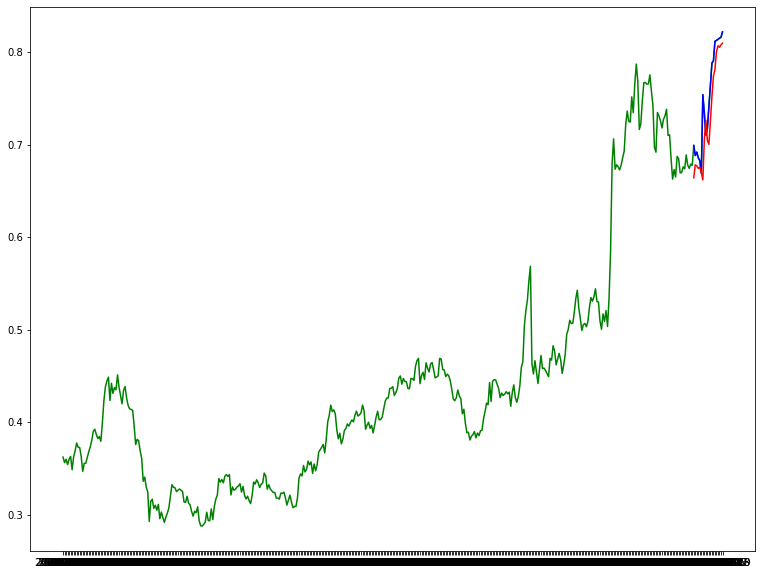

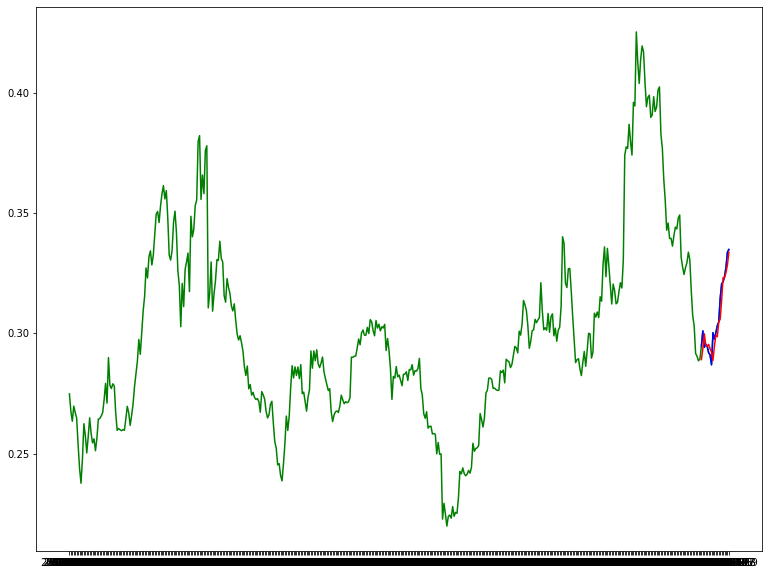

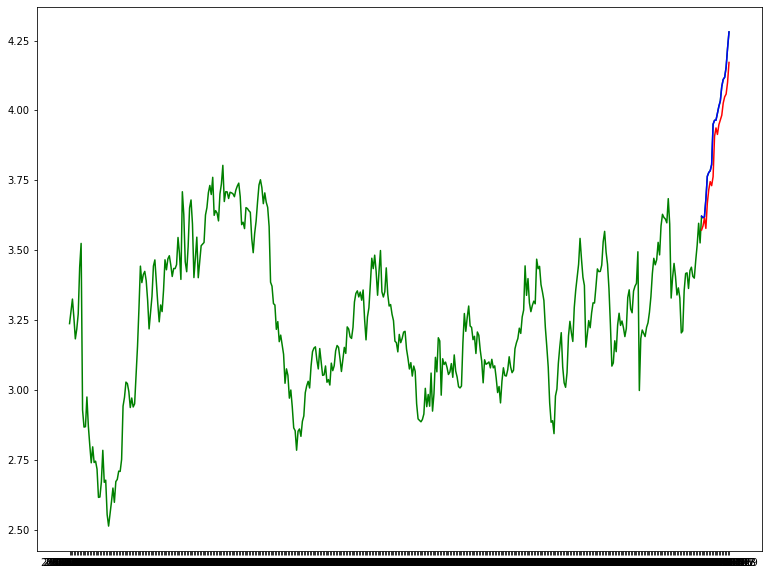

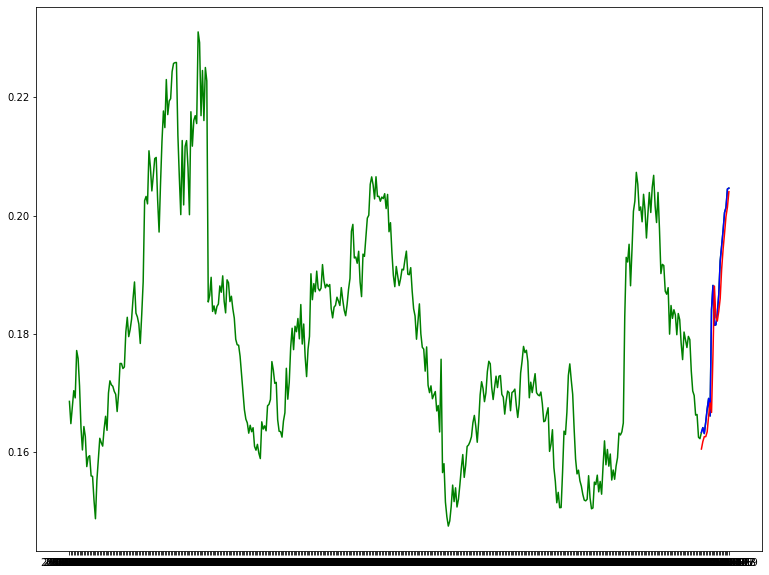

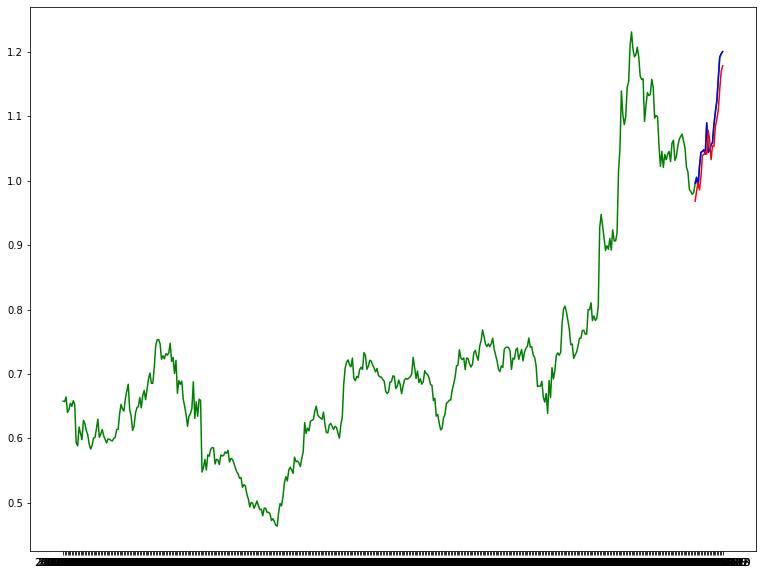

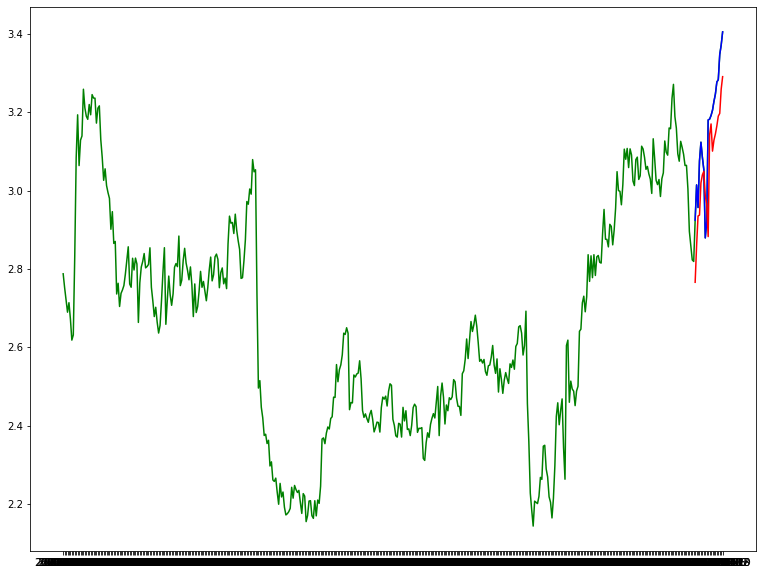

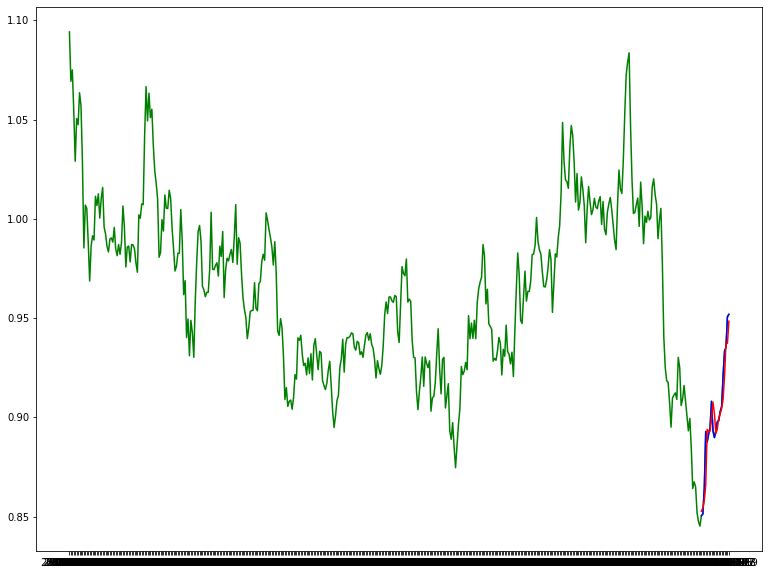

In [125]:
for number in range(7):
    fig, ax = plt.subplots(1,1,figsize = (13,10))
    ax.plot(frames[number][frames[number].columns[0][0:457]],color='green')
    ax.plot(frames[number].index[-20:],y_tests[number],color='blue')
    ax.plot(frames[number].index[-20:],predictions[number-0],color='red')

In [58]:
y_tests
predictions

[[0.674567,
  0.694861,
  0.69642276,
  0.6944484,
  0.6930664,
  0.6867849,
  0.68217325,
  0.748465,
  0.7619783,
  0.73543453,
  0.7232112,
  0.7382195,
  0.7583919,
  0.7822829,
  0.79346615,
  0.8110699,
  0.8165522,
  0.8116954,
  0.81526005,
  0.81789947],
 [0.29487985,
  0.29792768,
  0.30425298,
  0.30417717,
  0.3022122,
  0.30121368,
  0.3006001,
  0.29715985,
  0.29624072,
  0.30382958,
  0.305881,
  0.3045206,
  0.30856967,
  0.3095019,
  0.32063192,
  0.32619208,
  0.32830846,
  0.3295661,
  0.33302563,
  0.33853877],
 [3.5206985,
  3.5359917,
  3.5622108,
  3.5173783,
  3.6078916,
  3.667788,
  3.6941679,
  3.6770072,
  3.7076197,
  3.857734,
  3.8891795,
  3.8512547,
  3.885129,
  3.9063017,
  3.92137,
  3.9720905,
  3.997034,
  4.0045247,
  4.0455303,
  4.115975],
 [0.16694498,
  0.16602378,
  0.16647574,
  0.16676863,
  0.16718483,
  0.16916528,
  0.17084724,
  0.17072666,
  0.17359462,
  0.18613645,
  0.18467885,
  0.18773985,
  0.18680649,
  0.18888175,
  0.19219837

In [61]:
mapes = []
for preds in predictions:
    for i in range(6):
        mape.append(mean_absolute_percentage_error(preds,y_tests[i]))
    mapes.append(mape)


In [62]:
mapes

[[11.351552411207972,
  55.87117939642734,
  464.06622017826703,
  73.65546716472284,
  55.50192659389541,
  358.3167038750228,
  32.028895846786575,
  2.3595566226813687,
  58.8691888620168,
  426.7309114072404,
  75.52022845058023,
  44.45998588234463,
  322.4054095200272,
  20.948447920025096,
  2.3595566226813687,
  58.8691888620168,
  426.7309114072404,
  75.52022845058023,
  44.45998588234463,
  322.4054095200272,
  2.3595566226813687,
  58.8691888620168,
  426.7309114072404,
  75.52022845058023,
  44.45998588234463,
  322.4054095200272,
  141.68389707268918,
  1.6411281694596238,
  1165.68532233232,
  41.10966792380445,
  247.09173766418849,
  914.1689087791484,
  80.24513249128829,
  91.9204755793596,
  3.4546470009678387,
  95.18757625533993,
  71.61835020543347,
  17.070736075758315,
  311.1896943128566,
  68.25311742764212,
  2054.471312322891,
  1.9116498002569475,
  490.9502437838041,
  1627.1332498479787,
  28.975215770067354,
  70.9593339228323,
  271.89105965594956,
  8